## Libraries used:

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statistics import random
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

## My dataset: Key Indicators On The Youth, Annual

https://data.gov.sg/dataset/key-indicators-on-the-youth-annual?resource_id=bfbc1a0f-4fcf-4506-a565-059e58b6c7ec

In [2]:
resident_youth_ratios = \
pd.read_csv("proportion-of-resident-youths-gross-enrolment-ratio-lfpr-pmets.csv",\
           na_values = ['na']) # identify na as a null

# i kinda used .unique() to find out na was within the "value" column and then back tracked to identify
# -> na_values = ['na']
resident_youth_ratios.tail()

,year,level_1,value
139,2019,Gross Enrolment Ratio - Post-secondary Non-ter...,NaN
140,2019,Gross Enrolment Ratio - Tertiary,NaN
141,2019,Resident Labour Force Participation Rate (15-1...,15.1
142,2019,Resident Labour Force Participation Rate (20-2...,61.0
143,2019,"Proportion Of Professionals, Managers, Executi...",28.5


In [3]:
resident_youth_ratios.level_1.unique().tolist() #get the unique rows

['Proportion Of Resident Youths (15 - 24 Years) Among Resident Population',
 'Gross Enrolment Ratio - Post-secondary Non-tertiary',
 'Gross Enrolment Ratio - Tertiary',
 'Resident Labour Force Participation Rate (15-19 Years)',
 'Resident Labour Force Participation Rate (20-24 Years)',
 'Proportion Of Professionals, Managers, Executives & Technicians Among Employed Residents (15-24 Years)']

CHECK FOR NULL VALUES

In [4]:
np.where(pd.isnull(resident_youth_ratios)) 
#no nulls cause i dropped them

(array([  5,  65, 133, 134, 139, 140], dtype=int64),
 array([2, 2, 2, 2, 2, 2], dtype=int64))

In [5]:
[resident_youth_ratios.iloc[i,j] for i,j in zip(*np.where(pd.isnull(resident_youth_ratios)))] 
#definitely no NaNs

[nan, nan, nan, nan, nan, nan]

In [6]:
resident_youth_ratios.dropna(axis=0, inplace= True)   # extracting rows with null values

In [7]:
# make a dataframe for each subplot for ease of view
youth_proportion_in_sg =\
resident_youth_ratios\
[resident_youth_ratios["level_1"] == "Proportion Of Resident Youths (15 - 24 Years) Among Resident Population"]

non_ter_post_secondary = \
resident_youth_ratios\
[resident_youth_ratios["level_1"] == "Gross Enrolment Ratio - Post-secondary Non-tertiary"]

ter_post_secondary = \
resident_youth_ratios\
[resident_youth_ratios["level_1"] == "Gross Enrolment Ratio - Tertiary"]

working_youths_15_to_19 = \
resident_youth_ratios\
[resident_youth_ratios["level_1"] == "Resident Labour Force Participation Rate (15-19 Years)"]

working_youths_20_to_24 = \
resident_youth_ratios\
[resident_youth_ratios["level_1"] == "Resident Labour Force Participation Rate (20-24 Years)"]

pro_mgr_exec_tech_youths_15_24 = \
resident_youth_ratios\
[resident_youth_ratios["level_1"] == "Proportion Of Professionals, Managers, Executives & \
Technicians Among Employed Residents (15-24 Years)"]

youth_proportion_in_sg.tail()

,year,level_1,value
114,2015,Proportion Of Resident Youths (15 - 24 Years) ...,13.0
120,2016,Proportion Of Resident Youths (15 - 24 Years) ...,12.7
126,2017,Proportion Of Resident Youths (15 - 24 Years) ...,12.4
132,2018,Proportion Of Resident Youths (15 - 24 Years) ...,12.1
138,2019,Proportion Of Resident Youths (15 - 24 Years) ...,11.7


Text(0.0, 1.0, 'Proportion Of Professionals, Managers, Executives & \nTechnicians Among Employed Residents (15-24 Years)')

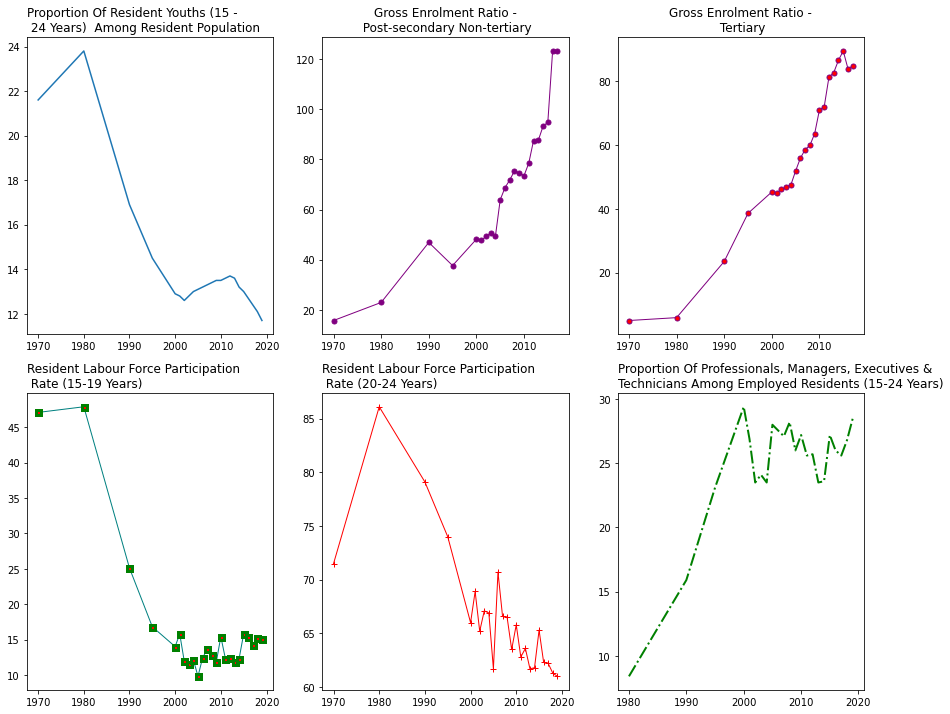

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(15, 12))

axes[0,0].plot(youth_proportion_in_sg.year, youth_proportion_in_sg.value)
axes[0,0].set_title('Proportion Of Resident Youths (15 -\n 24 Years)  Among Resident Population',loc="left")

axes[0,1].plot(non_ter_post_secondary.year, non_ter_post_secondary.value\
              ,color="purple",lw=1, ls='-', marker='o', markersize=5)  
axes[0,1].axis('tight')          # tightly fitted axes
axes[0,1].set_title("Gross Enrolment Ratio -\n Post-secondary Non-tertiary")

axes[0,2].plot(ter_post_secondary.year,ter_post_secondary.value,\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[0,2].axis('tight') 
axes[0,2].set_title("Gross Enrolment Ratio -\n Tertiary")

axes[1,0].plot(working_youths_15_to_19.year,working_youths_15_to_19.value,\
              color="teal", lw=1, ls='-', marker='s', markersize=5, 
        markerfacecolor="red", markeredgewidth=3, markeredgecolor="green")
axes[1,0].axis('tight') 
axes[1,0].set_title("Resident Labour Force Participation \n Rate (15-19 Years)",loc="left")

axes[1,1].plot(working_youths_20_to_24.year,working_youths_20_to_24.value,\
              color="red", lw=1, ls='-', marker='+')
axes[1,1].axis('tight') 
axes[1,1].set_title("Resident Labour Force Participation \n Rate (20-24 Years)",loc="left")

axes[1,2].plot(pro_mgr_exec_tech_youths_15_24.year,pro_mgr_exec_tech_youths_15_24.value,\
              color="green", lw=2, ls='-.')
axes[1,2].axis('tight') 
axes[1,2].set_title("Proportion Of Professionals, Managers, Executives & \n\
Technicians Among Employed Residents (15-24 Years)",loc="left")



Proportion Of Resident Youths (15 - 24 Years)  Among Resident Population:
insight: our population is an aging one



# Subject: Education, Language Spoken and Literacy
# Topic: Highest Qualification Attained
# Title: M850581-Singapore Residents Aged 25 Years & Over 
# By Highest Qualification Attained, Sex And Age Group, Annual

Data pertain to residents who are not attending educational institutions as full-time students.  
The data include those who are upgrading their qualifications through part-time courses while working.
https://www.singstat.gov.sg/publications/population/population-trends


## SUB-Q #1:
A brief overview of the Singapore education landscape and has the Government been pushing out enough policies to help in the overall education level of Singaporeans?

In [9]:
def strip_spaces(a_str_with_spaces_to_int):
    y = a_str_with_spaces_to_int.replace(',', '')
    return int(y)

In [10]:
pop_trends = pd.read_excel("Population Trends.xlsx",sheet_name = "T8",index_col="Variables",\
                          converters={'1990': strip_spaces,'1991': strip_spaces, '1992': strip_spaces,
                                     '1993': strip_spaces,'1994': strip_spaces, '1995': strip_spaces,
                                     '1996': strip_spaces,'1997': strip_spaces, '1998': strip_spaces,
                                     '1999': strip_spaces,'2000': strip_spaces, '2001': strip_spaces,
                                     '2002': strip_spaces,'2003': strip_spaces, '2004': strip_spaces,
                                     '2005': strip_spaces,'2006': strip_spaces, '2007': strip_spaces,
                                     '2008': strip_spaces,'2009': strip_spaces, '2010': strip_spaces,
                                     '2011': strip_spaces,'2012': strip_spaces, '2013': strip_spaces,
                                     '2014': strip_spaces,'2015': strip_spaces, '2016': strip_spaces,
                                     '2017': strip_spaces,'2018': strip_spaces, '2019': strip_spaces})
pop_trends.head(8)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Variables,,,,,,,,,,,,,,,,,,,,,
Total,1622300,1679300,1730600,1768400,1816800,1860900,1916400,1969700,2020800,2067300,...,2576000,2601900,2626400,2669100,2732600,2750900,2795200,2846000,2877000,2922700
25 - 29 Years,281500,272100,271400,255300,256100,239900,240700,248300,242200,251500,...,249400,230900,223200,223700,231700,232800,253000,242300,251800,252300
30 - 34 Years,292700,288300,292200,283400,291000,292400,298200,293000,290000,293400,...,289300,280100,271700,274600,276900,269900,268200,262300,263800,273200
35 - 39 Years,252600,259900,266700,278300,291500,301200,305800,303400,307700,309900,...,317300,306900,302300,297500,287900,300200,288900,305700,303400,296900
40 - 44 Years,203900,226500,232100,248900,248300,264400,278700,286200,299600,300300,...,303500,302300,310800,310300,305100,315300,304000,320000,313100,304500
45 - 49 Years,127500,137700,155100,175700,190400,211300,233900,244500,252200,251800,...,319600,321700,319200,315100,298600,301500,301100,313700,313200,323000
50 - 54 Years,117500,136300,145000,141900,142200,132800,130900,154900,171400,186100,...,303600,309600,313200,318900,318300,319400,321700,307800,316600,311900
55 - 59 Years,99800,107200,108300,113700,118900,121700,127800,133000,132100,131900,...,252800,267400,272100,280200,296400,296700,299500,285000,299000,316100


In [11]:
#swap my columns and index
pop_trends_t= pop_trends.T
pop_trends_t.tail(1)

Variables,Total,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,50 - 54 Years,55 - 59 Years,60 - 64 Years,65 Years & Over,...,Total Females - University,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,50 - 54 Years,55 - 59 Years,60 - 64 Years,65 Years & Over
2019,2922700,252300,273200,296900,304500,323000,311900,316100,266200,578600,...,470500,77400,83800,88300,78000,61200,34400,23000,10700,13600


In [12]:
pop_trends.index.unique().tolist()

['Total',
 '        25 - 29 Years',
 '        30 - 34 Years',
 '        35 - 39 Years',
 '        40 - 44 Years',
 '        45 - 49 Years',
 '        50 - 54 Years',
 '        55 - 59 Years',
 '        60 - 64 Years',
 '        65 Years & Over',
 'Total - Below Secondary',
 'Total- Secondary',
 'Total - Post Secondary (Non-tertiary)',
 'Total - Diploma & Professional Qualification',
 'Total - University',
 'Total Males',
 'Total Males - Below Secondary',
 'Total Males - Secondary',
 'Total Males - Post Secondary (Non-tertiary)',
 'Total Males - Diploma & Professional Qualification',
 'Total Males - University',
 'Total Females',
 'Total Females - Below Secondary',
 'Total Females - Secondary',
 'Total Females - Post Secondary (Non-tertiary)',
 'Total Females - Diploma & Professional Qualification',
 'Total Females - University']

In [13]:
#seperate dataframe into each unique value

# total_below_secondaryno_t   = pop_trends.iloc[11:20]
# total_secondaryno_t         = pop_trends.iloc[21:30]
# post_sec_non_tetno_t        = pop_trends.iloc[31:40]
# post_sec_dip_n_pro_qualno_t = pop_trends.iloc[41:50]
# post_sec_unino_t            = pop_trends.iloc[51:60]
# total_maleno_t              = pop_trends.iloc[61:70]
# m__below_secondaryno_t      = pop_trends.iloc[71:80]
# m_total_secondaryno_t       = pop_trends.iloc[81:90]
# m_post_sec_non_tetno_t      = pop_trends.iloc[91:100]
# m_post_sec_dip_n_pro_qualno_t = pop_trends.iloc[101:110]
# m_post_sec_unino_t          = pop_trends.iloc[111:120]
# total_femaleno_t            = pop_trends.iloc[121:130]
# female__below_secondaryno_t = pop_trends.iloc[131:140]
# f_total_secondaryno_t       = pop_trends.iloc[141:150]
# f_post_sec_non_tetno_t      = pop_trends.iloc[151:160]
# f_post_sec_dip_n_pro_qualno_t = pop_trends.iloc[161:170]
# f_post_sec_unino_t          = pop_trends.iloc[171:180]

# total                     = pop_trends_t.iloc[:, 1:10]
total_below_secondary     = pop_trends_t.iloc[:,11:20]
total_secondary           = pop_trends_t.iloc[:,21:30]
post_sec_non_tet          = pop_trends_t.iloc[:,31:40]
post_sec_dip_n_pro_qual   = pop_trends_t.iloc[:,41:50]
post_sec_uni              = pop_trends_t.iloc[:,51:60]

total_male                = pop_trends_t.iloc[:,61:70]
m__below_secondary        = pop_trends_t.iloc[:,71:80]
m_total_secondary         = pop_trends_t.iloc[:,81:90]
m_post_sec_non_tet        = pop_trends_t.iloc[:,91:100]
m_post_sec_dip_n_pro_qual = pop_trends_t.iloc[:,101:110]
m_post_sec_uni            = pop_trends_t.iloc[:,111:120]

total_female              = pop_trends_t.iloc[:,121:130]
female__below_secondary   = pop_trends_t.iloc[:,131:140]
f_total_secondary         = pop_trends_t.iloc[:,141:150]
f_post_sec_non_tet        = pop_trends_t.iloc[:,151:160]
f_post_sec_dip_n_pro_qual = pop_trends_t.iloc[:,161:170]
f_post_sec_uni            = pop_trends_t.iloc[:,171:180]

total_below_secondary.tail(5)

Variables,25 - 29 Years,30 - 34 Years,35 - 39 Years,40 - 44 Years,45 - 49 Years,50 - 54 Years,55 - 59 Years,60 - 64 Years,65 Years & Over
2015,9400,13400,20000,35800,59400,99700,118900,118200,325300
2016,9500,12500,20500,32400,55100,101800,116400,128600,342500
2017,7600,11100,18700,32400,47600,90700,106100,126800,372900
2018,8700,10700,17000,28200,43300,82200,100400,124600,346400
2019,8100,10500,15700,24400,39800,69900,105300,110400,361500


## Trends of education over 1990 - 2019

<ipython-input-14-060461652253>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_xticklabels(xlabels, rotation=90)
<ipython-input-14-060461652253>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i,j].set_yticklabels(ylabels, rotation=5)


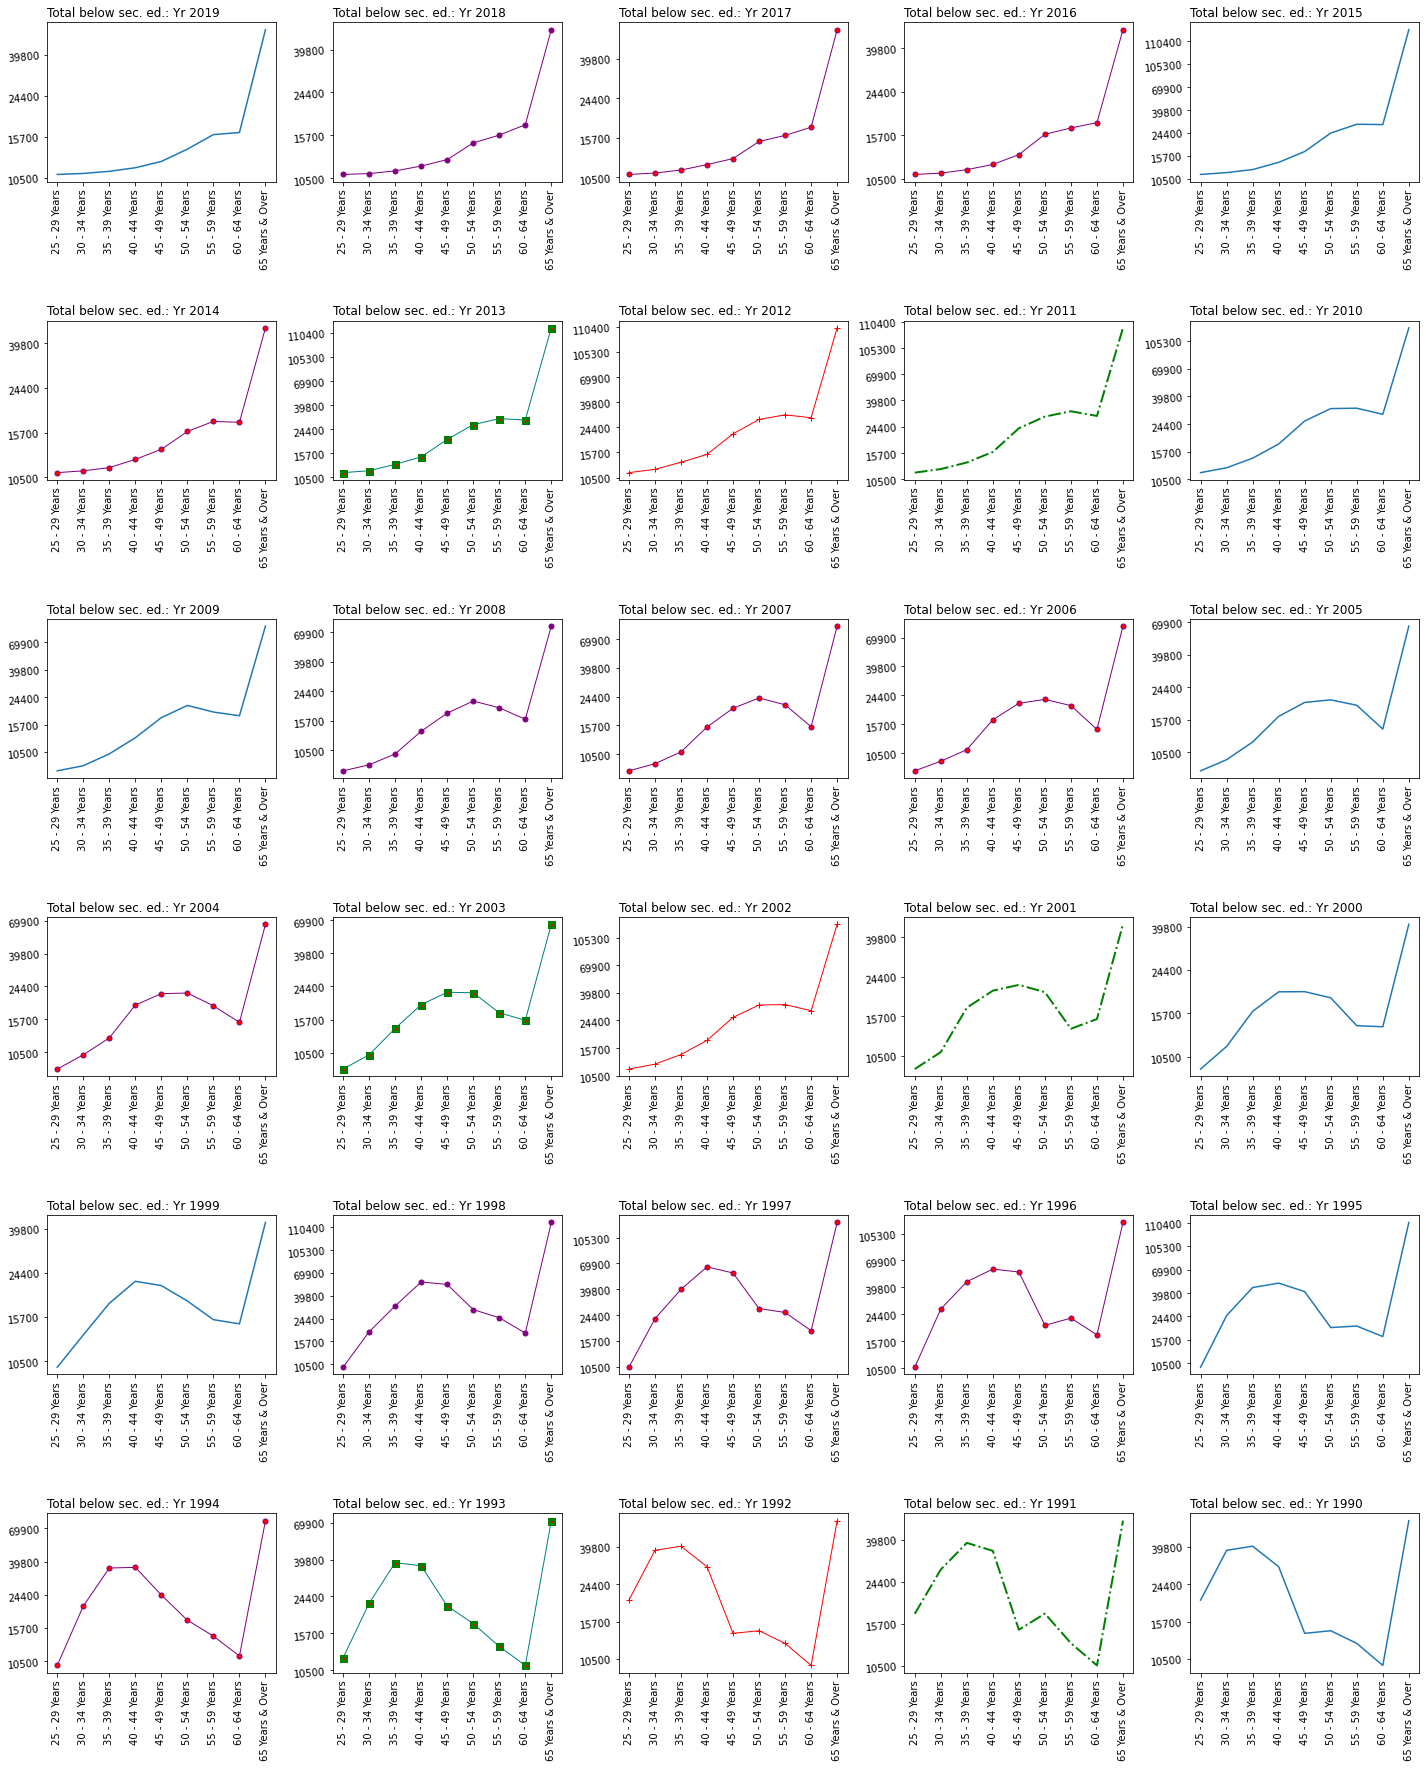

In [14]:
fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize=(20, 25))
xlabels = total_below_secondary.loc["2019"].index.tolist() 
ylabels =  total_below_secondary.loc["2019"]
for i in range(6):
    for j in range(5):
        axes[i,j].set_xticklabels(xlabels, rotation=90)
        axes[i,j].set_yticklabels(ylabels, rotation=5)
        

axes[0,0].plot(total_below_secondary.loc["2019"].index, total_below_secondary.loc["2019"])
axes[0,0].set_title("Total below sec. ed.: Yr 2019",loc="left")
axes[0,1].plot(total_below_secondary.loc["2018"].index, total_below_secondary.loc["2018"]\
              ,color="purple",lw=1, ls='-', marker='o', markersize=5)  
axes[0,1].set_title("Total below sec. ed.: Yr 2018",loc="left")

axes[0,2].plot(total_below_secondary.loc["2017"].index,total_below_secondary.loc["2017"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[0,2].set_title("Total below sec. ed.: Yr 2017",loc="left")

axes[0,3].plot(total_below_secondary.loc["2016"].index,total_below_secondary.loc["2016"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[0,3].set_title("Total below sec. ed.: Yr 2016",loc="left")

axes[0,4].plot(total_below_secondary.loc["2015"].index,total_below_secondary.loc["2015"],)
axes[0,4].set_title("Total below sec. ed.: Yr 2015",loc="left")

axes[1,0].plot(total_below_secondary.loc["2014"].index,total_below_secondary.loc["2014"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[1,0].set_title("Total below sec. ed.: Yr 2014",loc="left")


axes[1,1].plot(total_below_secondary.loc["2013"].index,total_below_secondary.loc["2013"],\
              color="teal", lw=1, ls='-', marker='s', markersize=5, 
        markerfacecolor="red", markeredgewidth=3, markeredgecolor="green")
axes[1,1].set_title("Total below sec. ed.: Yr 2013",loc="left")

axes[1,2].plot(total_below_secondary.loc["2012"].index,total_below_secondary.loc["2012"],\
              color="red", lw=1, ls='-', marker='+')
axes[1,2].set_title("Total below sec. ed.: Yr 2012",loc="left")

axes[1,3].plot(total_below_secondary.loc["2011"].index,total_below_secondary.loc["2011"],\
              color="green", lw=2, ls='-.')
axes[1,3].set_title("Total below sec. ed.: Yr 2011",loc="left")

axes[1,4].plot(total_below_secondary.loc["2010"].index,total_below_secondary.loc["2010"])
axes[1,4].set_title("Total below sec. ed.: Yr 2010",loc="left")

axes[2,0].plot(total_below_secondary.loc["2009"].index, total_below_secondary.loc["2009"])
axes[2,0].set_title("Total below sec. ed.: Yr 2009",loc="left")
# axes[0,0].set_xticks(rotation= 45)
axes[2,1].plot(total_below_secondary.loc["2008"].index, total_below_secondary.loc["2008"]\
              ,color="purple",lw=1, ls='-', marker='o', markersize=5)  
axes[2,1].set_title("Total below sec. ed.: Yr 2008",loc="left")

axes[2,2].plot(total_below_secondary.loc["2007"].index,total_below_secondary.loc["2007"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[2,2].set_title("Total below sec. ed.: Yr 2007",loc="left")

axes[2,3].plot(total_below_secondary.loc["2006"].index,total_below_secondary.loc["2006"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[2,3].set_title("Total below sec. ed.: Yr 2006",loc="left")

axes[2,4].plot(total_below_secondary.loc["2005"].index,total_below_secondary.loc["2005"])
axes[2,4].set_title("Total below sec. ed.: Yr 2005",loc="left")

axes[3,0].plot(total_below_secondary.loc["2004"].index,total_below_secondary.loc["2004"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[3,0].set_title("Total below sec. ed.: Yr 2004",loc="left")


axes[3,1].plot(total_below_secondary.loc["2003"].index,total_below_secondary.loc["2003"],\
              color="teal", lw=1, ls='-', marker='s', markersize=5, 
        markerfacecolor="red", markeredgewidth=3, markeredgecolor="green")
axes[3,1].set_title("Total below sec. ed.: Yr 2003",loc="left")

axes[3,2].plot(total_below_secondary.loc["2002"].index,total_below_secondary.loc["2010"],\
              color="red", lw=1, ls='-', marker='+')
axes[3,2].set_title("Total below sec. ed.: Yr 2002",loc="left")

axes[3,3].plot(total_below_secondary.loc["2001"].index,total_below_secondary.loc["2001"],\
              color="green", lw=2, ls='-.')
axes[3,3].set_title("Total below sec. ed.: Yr 2001",loc="left")

axes[3,4].plot(total_below_secondary.loc["2000"].index,total_below_secondary.loc["2000"])
axes[3,4].set_title("Total below sec. ed.: Yr 2000",loc="left")

axes[4,0].plot(total_below_secondary.loc["1999"].index, total_below_secondary.loc["1999"])
axes[4,0].set_title("Total below sec. ed.: Yr 1999",loc="left")
# axes[0,0].set_xticks(rotation= 45)
axes[4,1].plot(total_below_secondary.loc["1998"].index, total_below_secondary.loc["1998"]\
              ,color="purple",lw=1, ls='-', marker='o', markersize=5)  
axes[4,1].set_title("Total below sec. ed.: Yr 1998",loc="left")

axes[4,2].plot(total_below_secondary.loc["1997"].index,total_below_secondary.loc["1997"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[4,2].set_title("Total below sec. ed.: Yr 1997",loc="left")

axes[4,3].plot(total_below_secondary.loc["1996"].index,total_below_secondary.loc["1996"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[4,3].set_title("Total below sec. ed.: Yr 1996",loc="left")

axes[4,4].plot(total_below_secondary.loc["1995"].index,total_below_secondary.loc["1995"],)
axes[4,4].set_title("Total below sec. ed.: Yr 1995",loc="left")

axes[5,0].plot(total_below_secondary.loc["1994"].index,total_below_secondary.loc["1994"],\
              color="purple", lw=1, ls='-', marker='o', markersize=5, markerfacecolor="red")
axes[5,0].set_title("Total below sec. ed.: Yr 1994",loc="left")


axes[5,1].plot(total_below_secondary.loc["1993"].index,total_below_secondary.loc["1993"],\
              color="teal", lw=1, ls='-', marker='s', markersize=5, 
        markerfacecolor="red", markeredgewidth=3, markeredgecolor="green")
axes[5,1].set_title("Total below sec. ed.: Yr 1993",loc="left")

axes[5,2].plot(total_below_secondary.loc["1992"].index,total_below_secondary.loc["1990"],\
              color="red", lw=1, ls='-', marker='+')
axes[5,2].set_title("Total below sec. ed.: Yr 1992",loc="left")

axes[5,3].plot(total_below_secondary.loc["1991"].index,total_below_secondary.loc["1991"],\
              color="green", lw=2, ls='-.')
axes[5,3].set_title("Total below sec. ed.: Yr 1991",loc="left")

axes[5,4].plot(total_below_secondary.loc["1990"].index,total_below_secondary.loc["1990"])
axes[5,4].set_title("Total below sec. ed.: Yr 1990",loc="left")

plt.tight_layout()

<AxesSubplot:title={'center':'Total population below secondary education'}>

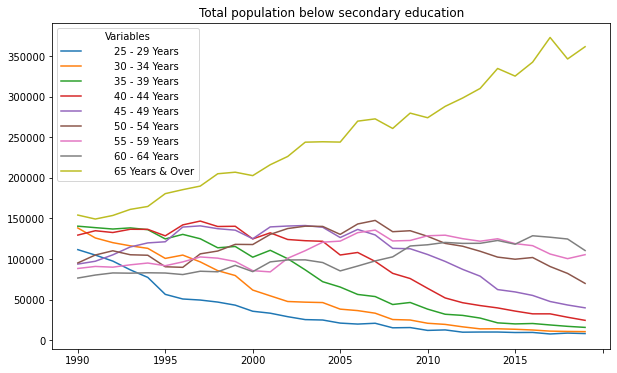

In [15]:
total_below_secondary.plot(kind= "line",figsize = (10,6), title = "Total population below secondary education")

## Insight:
more and more people getting secondary school education at the very least
## ** the big lump on the left in the early years is moved to the right of the graphs while the new entrants are low indicating more and more people are getting secondary school education at the very least

<AxesSubplot:title={'center':'Total population post secondary (Non-tetiary)'}>

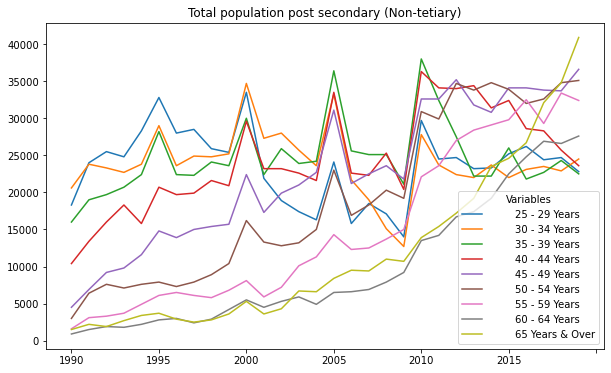

In [16]:
post_sec_non_tet.plot(kind= "line",figsize = (10,6), title = "Total population post secondary (Non-tetiary)")

<AxesSubplot:title={'center':'Total population post secondary (Diploma/Professional cert.)'}>

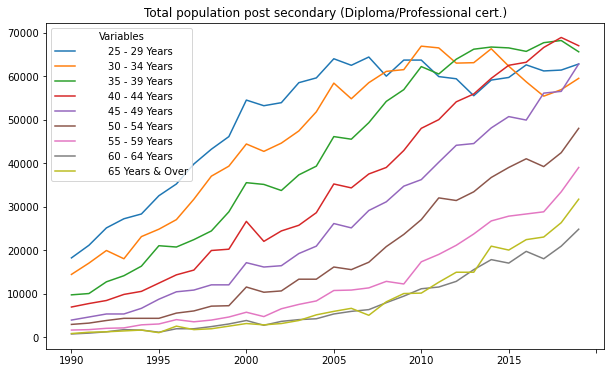

In [17]:
post_sec_dip_n_pro_qual.plot(kind= "line",figsize = (10,6), \
                             title = "Total population post secondary (Diploma/Professional cert.)")

<AxesSubplot:title={'center':'Total population post secondary (Uni)'}>

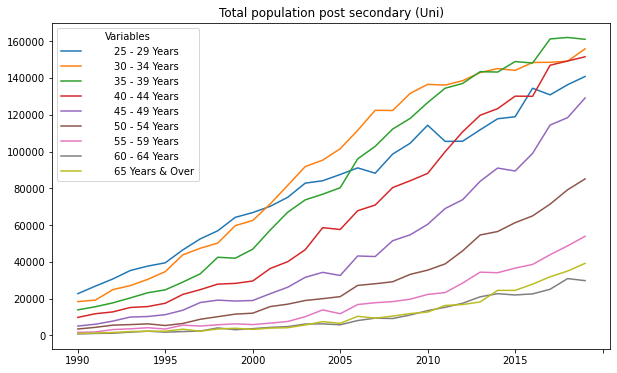

In [97]:
post_sec_uni.plot(kind= "line",figsize = (10,6), title = "Total population post secondary (Uni)")

<AxesSubplot:title={'center':'Total population post secondary (Female Uni)'}>

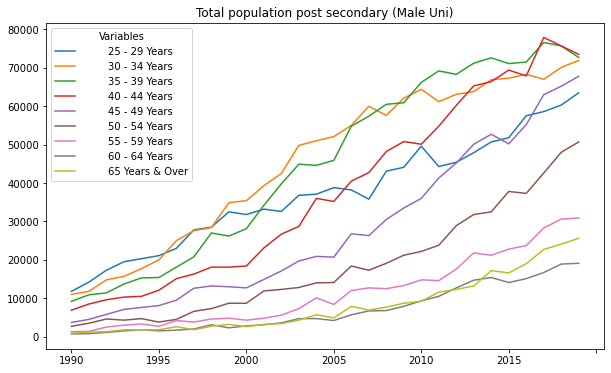

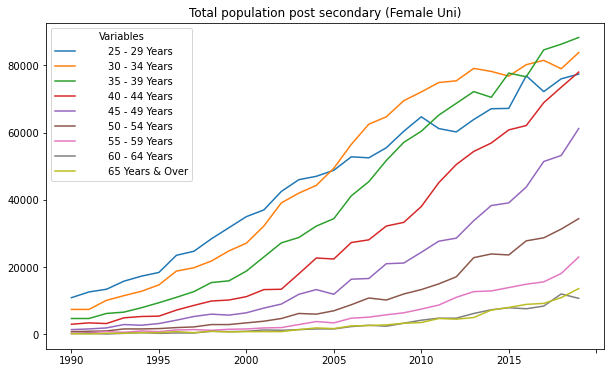

In [19]:
m_post_sec_uni
m_post_sec_uni.plot(kind= "line",figsize = (10,6), title = "Total population post secondary (Male Uni)")
f_post_sec_uni.plot(kind= "line",figsize = (10,6), title = "Total population post secondary (Female Uni)")

<AxesSubplot:title={'center':'Total population secondary (ALL)'}>

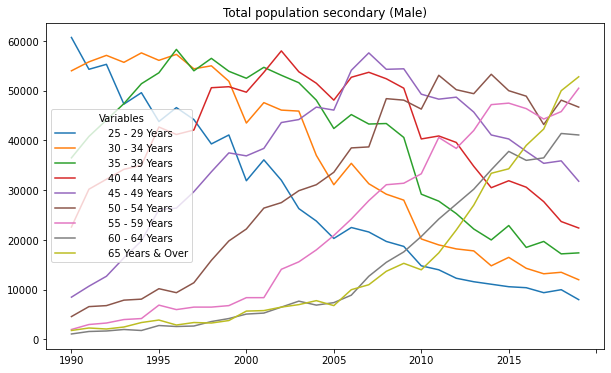

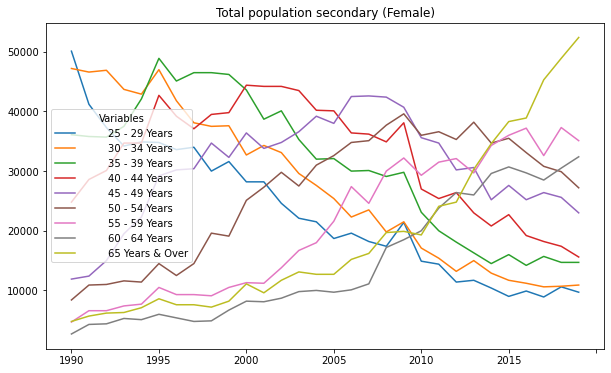

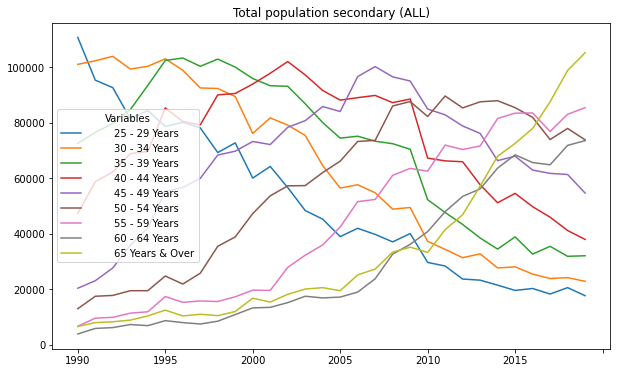

In [20]:
f_total_secondary.plot(kind= "line",figsize = (10,6), title = "Total population secondary (Male)")
m_total_secondary.plot(kind= "line",figsize = (10,6), title = "Total population secondary (Female)")
total_secondary.plot(kind= "line",figsize = (10,6), title = "Total population secondary (ALL)")


## Answer to sub-Q #1: yes.
**#1) students aged 15-24 who need to work part time are dropping **

**#2) students aged 15 and above holding quality entry level or above jobs have been maintained since 2000s**

**#3) Levels of at least secondary school education is dropping**

**#4) Levels of post secondary regardless of non-tetiary are increasing rapidly.**

## Student education dataset

https://www.kaggle.com/ishandutta/student-performance-data-set

"student-mat.csv" is for math

"student-por.csv" is for Portugese

In [21]:
# completely no outliers as the dataset is from kaggle and i checked all the ranges of data are within specified range
student_mat = pd.read_csv("student-mat.csv", sep=";")
student_mat.tail(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [22]:
student_por = pd.read_csv("student-por.csv", sep=";")
student_por.tail(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [87]:
student_both = pd.merge(student_mat,student_por, how ="inner", \
                        on =["school","sex","age","address","famsize","Pstatus",\
                              "Medu","Fedu","Mjob","Fjob","reason","nursery","internet","traveltime","famrel"\
                            ,"guardian","higher","activities"])
student_both.columns.tolist()
#370 unique students who did both math and Portugese surveys
#how i know?
# same school etc. see inner merge on in list

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime_x',
 'failures_x',
 'schoolsup_x',
 'famsup_x',
 'paid_x',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic_x',
 'famrel',
 'freetime_x',
 'goout_x',
 'Dalc_x',
 'Walc_x',
 'health_x',
 'absences_x',
 'G1_x',
 'G2_x',
 'G3_x',
 'studytime_y',
 'failures_y',
 'schoolsup_y',
 'famsup_y',
 'paid_y',
 'romantic_y',
 'freetime_y',
 'goout_y',
 'Dalc_y',
 'Walc_y',
 'health_y',
 'absences_y',
 'G1_y',
 'G2_y',
 'G3_y']

## IDEALS

In [24]:
# T-test to check if traveltime affects traveltime
Ho = "Traveltime affects grades negatively"         # Stating the Null Hypothesis
Ha = "Traveltime doesnt affect grades negatively"   # Stating the Alternate Hypothesis

x2 = np.array(student_both.G3_x[student_both.traveltime == 4][student_both.G3_x<10])  
# Selecting grades for travel time == 4 as we saw in the graph it is a downward trend
y2 = np.array(student_both.G3_x) 
# Selecting comparison to ALL grades for G3 (which is dependent on G1 & G2)

t, p_value  = stats.ttest_ind(x2,y2, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05, this finding is statistically significant as it indicates \
    strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct \
    (and the results are random).')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05, \n Alt hypothesis is not statistically significant and indicates, \
    \n strong evidence for the null hypothesis as there is more than 95% probability the null is correct. ')

Traveltime affects grades negatively as the p_value (0.05507671760061295) > 0.05, 
 Alt hypothesis is not statistically significant and indicates,     
 strong evidence for the null hypothesis as there is more than 95% probability the null is correct. 


In [26]:
por_ideals_heat = student_both[["G3_y","G2_y","G1_y", "traveltime","studytime_y","freetime_y",
                         "goout_y","failures_y","absences_y"]]
por_ideals_heat.corr()

,G3_y,G2_y,G1_y,traveltime,studytime_y,freetime_y,goout_y,failures_y,absences_y
G3_y,1.000000,0.889678,0.816962,-0.153028,0.272652,-0.106566,-0.135305,-0.340582,-0.119905
G2_y,0.889678,1.000000,0.886765,-0.184732,0.267034,-0.109949,-0.141892,-0.296951,-0.182873
G1_y,0.816962,0.886765,1.000000,-0.188236,0.260313,-0.094501,-0.101579,-0.290019,-0.149207
traveltime,-0.153028,-0.184732,-0.188236,1.000000,-0.102601,-0.023178,0.037225,0.080501,0.019400
studytime_y,0.272652,0.267034,0.260313,-0.102601,1.000000,-0.135327,-0.062110,-0.197013,-0.150294
freetime_y,-0.106566,-0.109949,-0.094501,-0.023178,-0.135327,1.000000,0.295725,0.078805,0.007012
goout_y,-0.135305,-0.141892,-0.101579,0.037225,-0.062110,0.295725,1.000000,0.089814,0.138777
failures_y,-0.340582,-0.296951,-0.290019,0.080501,-0.197013,0.078805,0.089814,1.000000,0.107064
absences_y,-0.119905,-0.182873,-0.149207,0.019400,-0.150294,0.007012,0.138777,0.107064,1.000000


<AxesSubplot:>

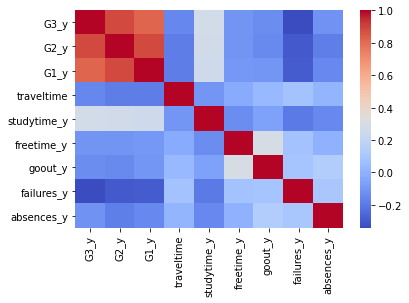

In [27]:
sns.heatmap(por_ideals_heat.corr(),cmap='coolwarm') #weak correlation for most of the important pts. against grades

In [28]:
mat_ideals_heat.corr()

,G3_x,G2_x,G1_x,traveltime,studytime_x,freetime_x,goout_x,failures_x,absences_x
G3_x,1.000000,0.906681,0.805134,-0.131892,0.074705,0.006605,-0.124181,-0.373315,0.018794
G2_x,0.906681,1.000000,0.856745,-0.161085,0.112158,-0.014207,-0.163191,-0.368838,-0.048014
G1_x,0.805134,0.856745,1.000000,-0.099365,0.139635,0.008627,-0.139491,-0.386685,-0.060171
traveltime,-0.131892,-0.161085,-0.099365,1.000000,-0.098524,-0.023178,0.038697,0.115174,-0.017870
studytime_x,0.074705,0.112158,0.139635,-0.098524,1.000000,-0.133836,-0.058418,-0.184728,-0.073389
freetime_x,0.006605,-0.014207,0.008627,-0.023178,-0.133836,1.000000,0.295883,0.077208,-0.045319
goout_x,-0.124181,-0.163191,-0.139491,0.038697,-0.058418,0.295883,1.000000,0.142855,0.073656
failures_x,-0.373315,-0.368838,-0.386685,0.115174,-0.184728,0.077208,0.142855,1.000000,0.033922
absences_x,0.018794,-0.048014,-0.060171,-0.017870,-0.073389,-0.045319,0.073656,0.033922,1.000000


<AxesSubplot:>

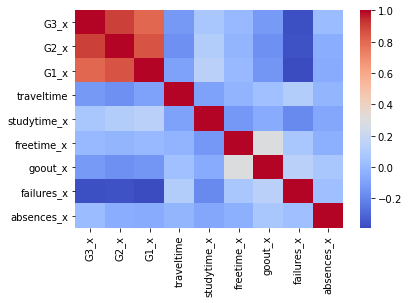

In [29]:
sns.heatmap(mat_ideals_heat.corr(),cmap='coolwarm')

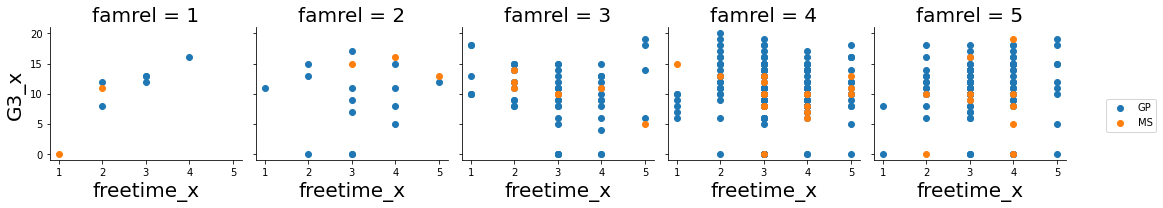

In [94]:
g = sns.FacetGrid(student_both, col="famrel", hue='school')
g = g.map(plt.scatter, "freetime_x","G3_x")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))
# grades and freetime

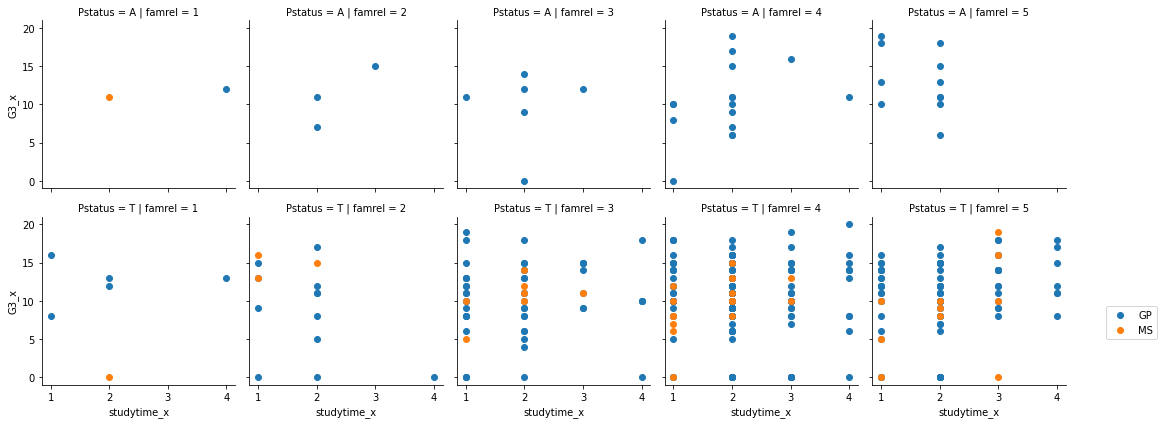

In [32]:
g = sns.FacetGrid(student_both, col="famrel", row = "Pstatus", hue='school')
g = g.map(plt.scatter, "studytime_x","G3_x")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))
# pstatus severely affects study time

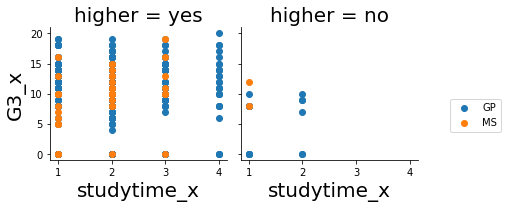

In [95]:
g = sns.FacetGrid(student_both, col="higher",  hue='school')
g = g.map(plt.scatter, "studytime_x","G3_x")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))
# wanting to go for tertiary education really goes for study time

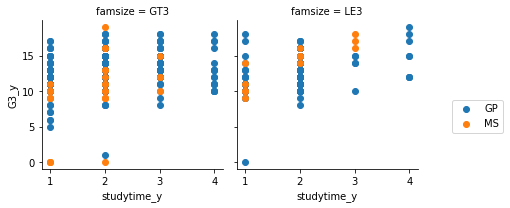

In [34]:
g = sns.FacetGrid(student_both, col="famsize",  hue='school')
g = g.map(plt.scatter, "studytime_y","G3_y")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))

#studytime vs Famsize

In [35]:
student_both.G3_x[student_both["famsize"]=="LE3"].mean()

11.23076923076923

In [36]:
student_both.G3_x[student_both["famsize"]=="GT3"].mean()
#<3 family size will drive mean grades up

10.172284644194757

<AxesSubplot:>

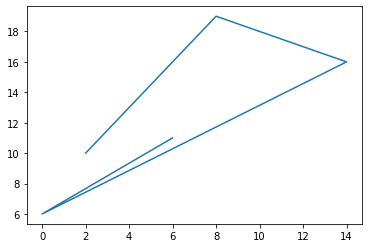

In [39]:
student_both.G3_x[student_both.absences_x[student_both["traveltime"] == 4]].plot()
#grades to absences graph for MATH

<AxesSubplot:>

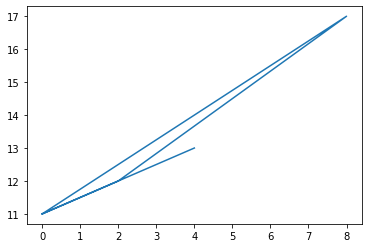

In [96]:
student_both.G3_y[student_both.absences_y[student_both["traveltime"] == 4]].plot()
#grades to absences graph for portugese

In [93]:
# T-test to check if traveltime affects traveltime
Ho = "ext./int assistance doesnt affect grades"         # Stating the Null Hypothesis
Ha = "ext./int assistance affects grades"               # Stating the Alternate Hypothesis

x2 = np.array(student_both.G3_x[student_both.paid_x == "no"][student_both.famsup_x == "no"]\
              [student_both.schoolsup_x == "no"])  
# students who have NO support
y2 = np.array(student_both.G3_x[student_both.paid_x == "yes"][student_both.famsup_x == "yes"]\
              [student_both.schoolsup_x == "yes"][student_both.G3_x>10]) 
# students who have ALL support and at least passed

t, p_value  = stats.ttest_ind(x2,y2, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05, this finding is statistically significant as it indicates \
    strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct \
    (and the results are random).')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05, \n Alt hypothesis is not statistically significant and indicates, \
    \n strong evidence for the null hypothesis as there is more than 95% probability the null is correct. ')

ext./int assistance doesnt affect grades as the p_value (0.4794973401464786) > 0.05, 
 Alt hypothesis is not statistically significant and indicates,     
 strong evidence for the null hypothesis as there is more than 95% probability the null is correct. 


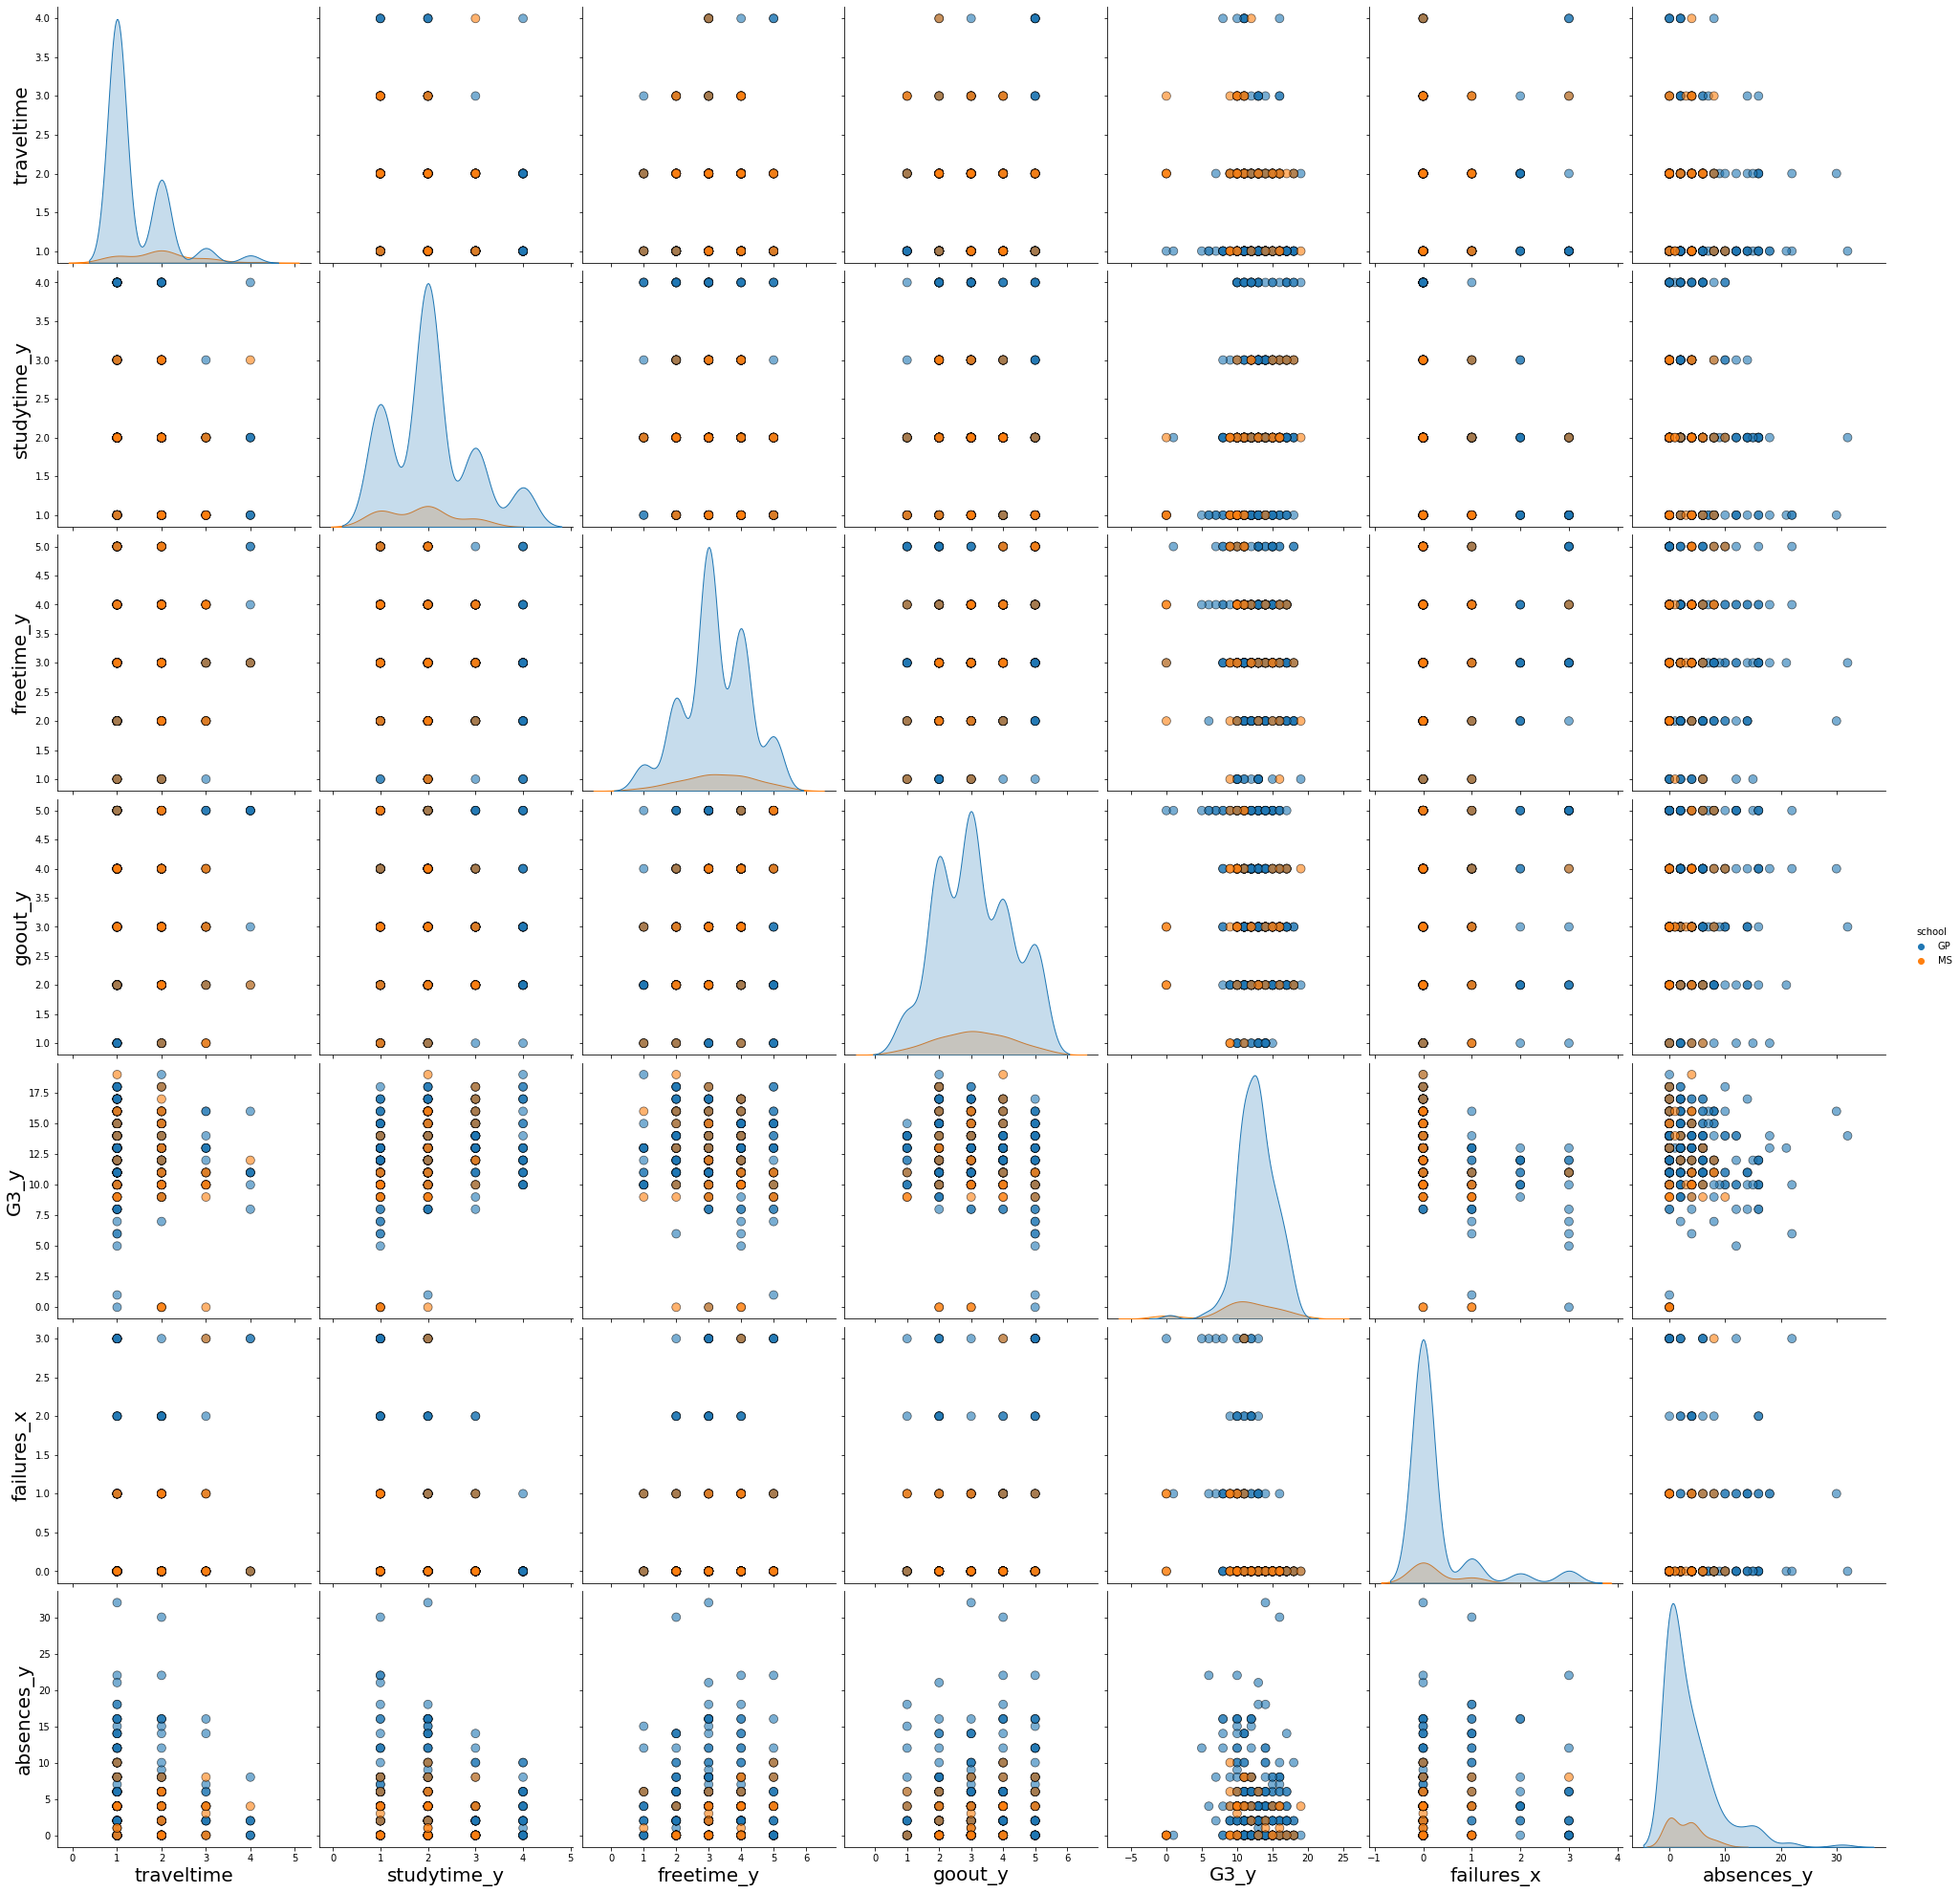

In [91]:
sns.pairplot(student_both, 
             vars = ['traveltime', 'studytime_y',"freetime_y","goout_y","G3_y","failures_x","absences_y"], 
             hue = 'school' ,
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);
# mpl.rcParams["axes.labelsize"] = 20 #change size

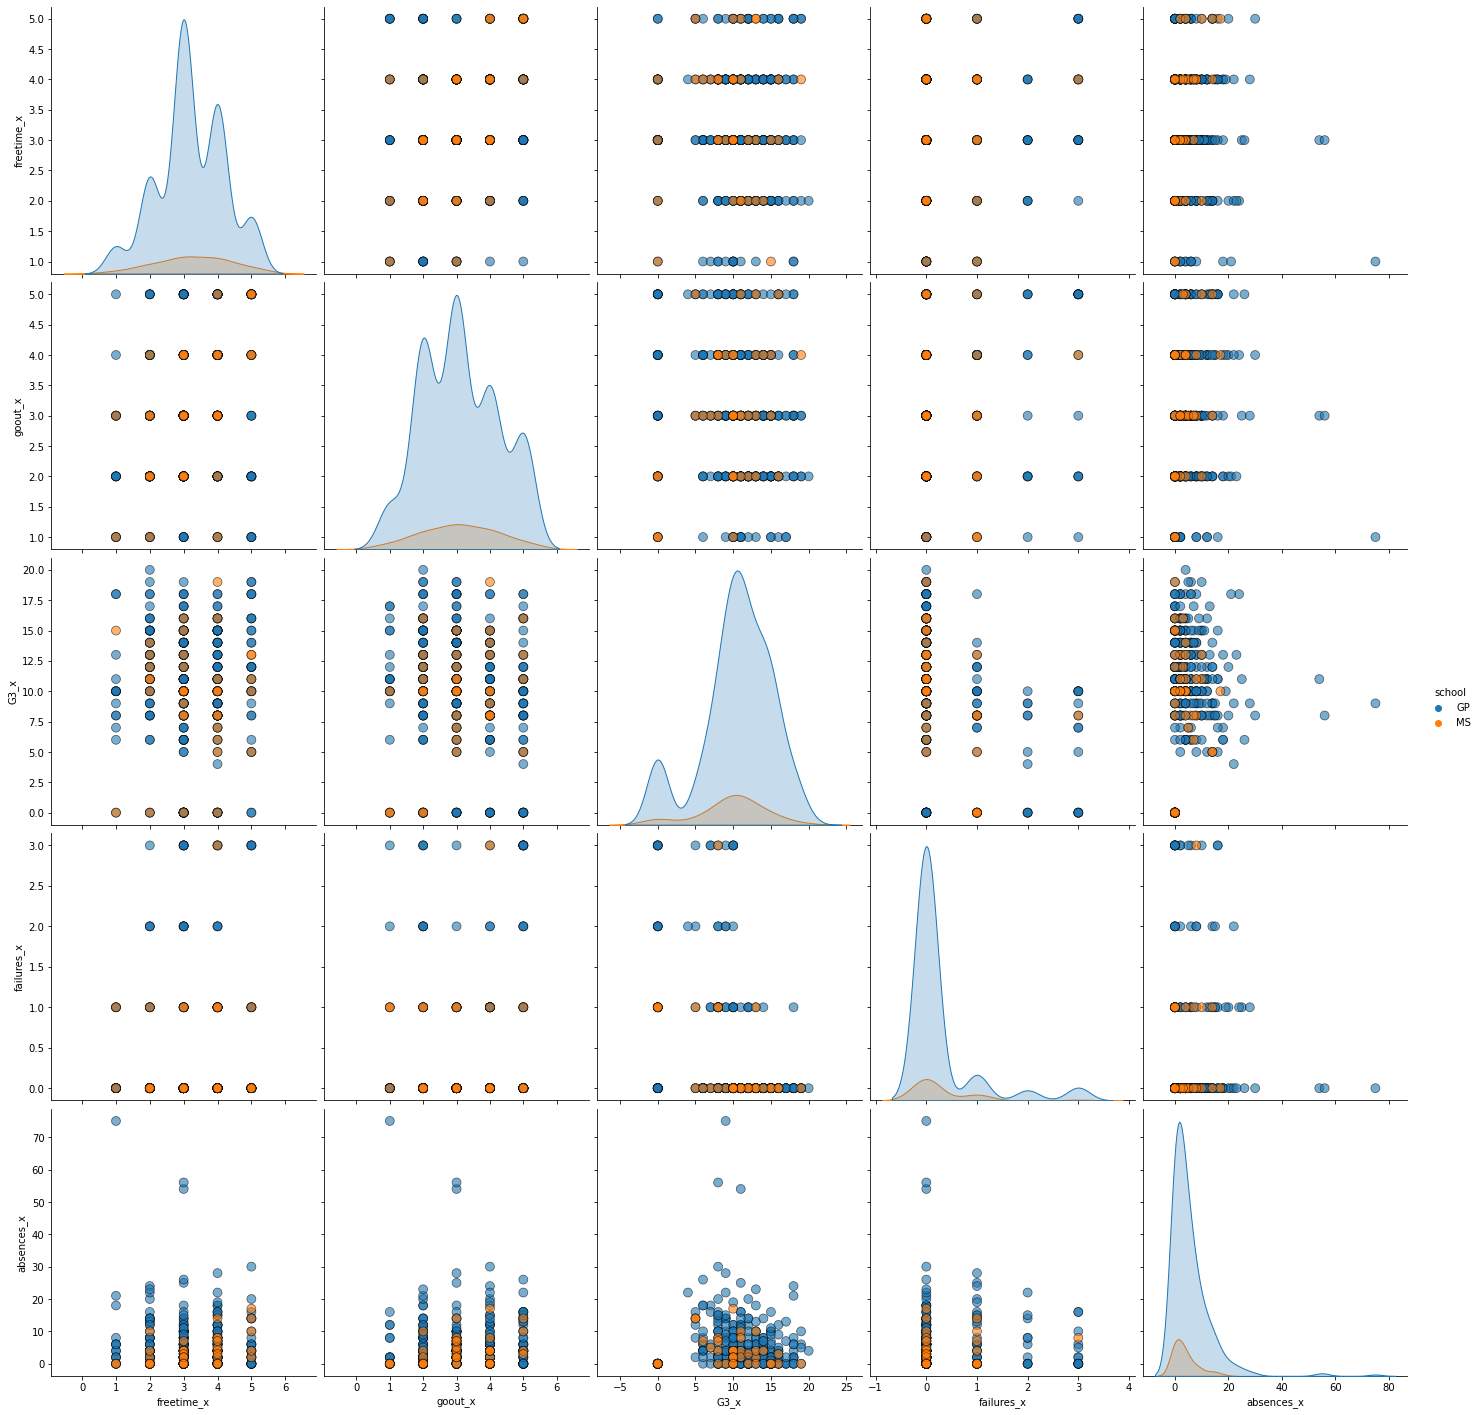

In [44]:
sns.pairplot(student_both, 
             vars = ["freetime_x","goout_x","G3_x","failures_x","absences_x"], 
             hue = 'school' ,
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);
# mpl.rcParams["axes.labelsize"] = 10
# 'schoolsup_x', 'famsup_x',"paid", 

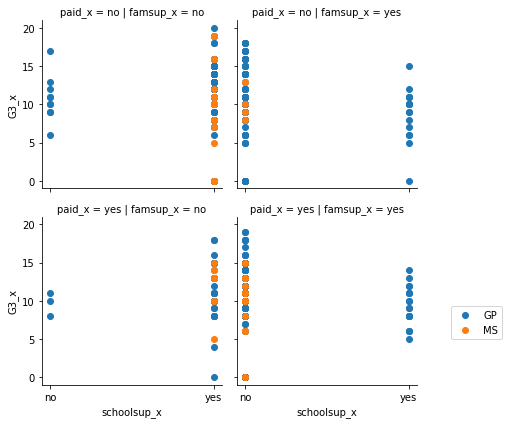

In [85]:
g = sns.FacetGrid(student_both, col="famsup_x",  row = "paid_x",hue='school') #, row = "Pstatus"
g = g.map(plt.scatter, "schoolsup_x","G3_x")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))

In [86]:
# T-test to check if GP is the more urban school
Ho = "Students who live in urban areas do better than R interms of passes"   # Stating the Null Hypothesis
Ha = "Students who live in urban areas do not do better interms of passes"   # Stating the Alternate Hypothesis

x1 = np.array(student_both.G3_x[student_both.address =="U"][student_both.G3_x > 10])  
# Selecting students who live in Urban and went to GP
y1 = np.array(student_both.G3_x[student_both.address == "R"][student_both.G3_x > 10]) 
# Selecting students who live in Urban did NOT go to GP

t, p_value  = stats.ttest_ind(x1,y1, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05, this finding is statistically significant as it indicates \
    strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct \
    (and the results are random).')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05, \n Alt hypothesis is not statistically significant and indicates, \
    \n strong evidence for the null hypothesis as there is more than 95% probability the null is correct. ')

Students who live in urban areas do better than R interms of passes as the p_value (0.3168604247165162) > 0.05, 
 Alt hypothesis is not statistically significant and indicates,     
 strong evidence for the null hypothesis as there is more than 95% probability the null is correct. 


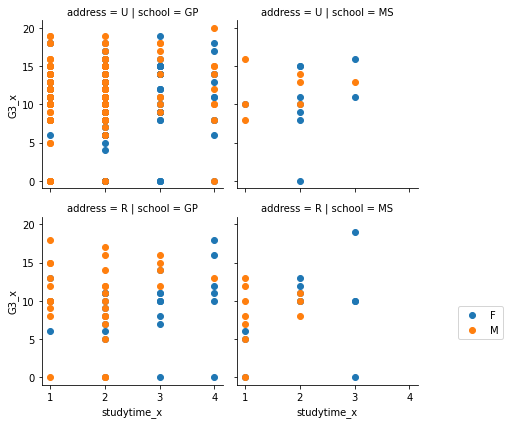

In [65]:
g = sns.FacetGrid(student_both, col="school",  row = "address",hue='sex')

g = g.map(plt.scatter, "studytime_x","G3_x")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))

In [66]:
student_both.G3_x[student_both.address =="U"].mean()

10.724137931034482

In [67]:
student_both.G3_x[student_both.address =="R"].mean()

9.555555555555555

In [60]:
student_both.G3_x[student_both.address =="U"][student_both.school=="GP"].mean()

10.724137931034482

In [68]:
student_both.G3_x[student_both.address =="R"][student_both.school=="GP"].mean()

9.898305084745763

In [69]:
student_both.G3_x[student_both.address =="U"][student_both.school=="MS"].mean()

11.117647058823529

In [70]:
student_both.G3_x[student_both.address =="R"][student_both.school=="MS"].mean()

8.636363636363637

<AxesSubplot:xlabel='address,school'>

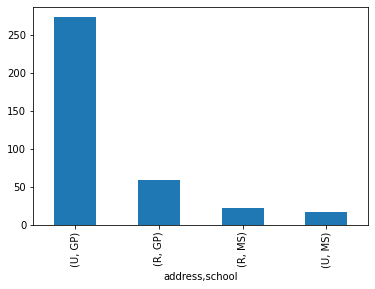

In [75]:
student_both[["address","school"]].value_counts().plot(kind = "bar")

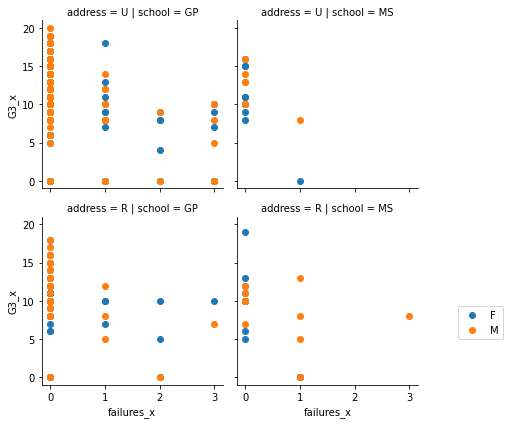

In [46]:
g = sns.FacetGrid(student_both, col="school",  row = "address",hue='sex') #, row = "Pstatus"
g = g.map(plt.scatter, "failures_x","G3_x")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))

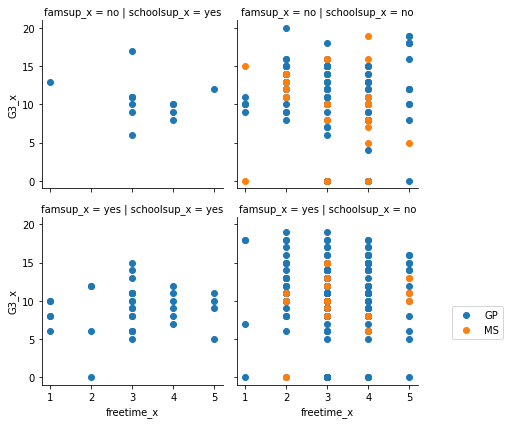

In [47]:
g = sns.FacetGrid(student_both, col="schoolsup_x",  row = "famsup_x",hue='school') #, row = "Pstatus"
g = g.map(plt.scatter, "freetime_x","G3_x")
# mpl.rcParams["axes.labelsize"] = 10 #change axes size
plt.tight_layout()
plt.legend(loc=0,bbox_to_anchor=(1.5,0.5))